In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Stilleri Seaborn olarak ayarlayın
sns.set()
# Sklearn ile k-means kümeleme yapabilmemiz için KMeans modülünü içe aktarın
from sklearn.cluster import KMeans

In [6]:
# Veriyi yükleyelim
data = pd.read_csv ('market_tatmin_sadakat.csv')

In [7]:
# Verinin içinde ne var kontrol edelim
data

,tatmin,sadakat
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Sadakat')

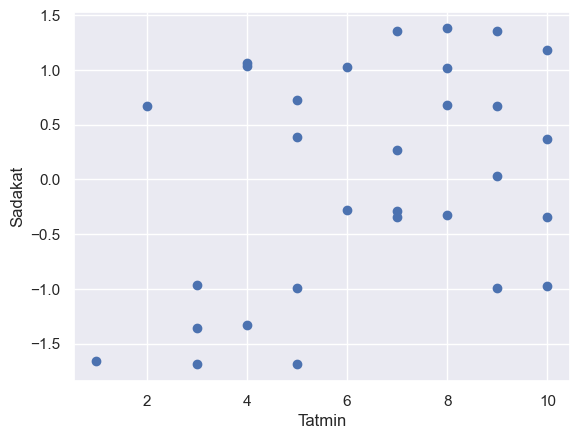

In [8]:
# İki değişkenin saçılım grafiğini oluşturalım
plt.scatter(data['tatmin'],data['sadakat'])
# Eksenleri isimlendirelim 
plt.xlabel('Tatmin')
plt.ylabel('Sadakat')

In [9]:
# Veri değişkeninin bir kopyasını oluşturarak her iki özelliği de seçiyoruz
x = data.copy()

In [10]:
# Bir nesne oluşturalım (buna kmeans diyelim)
# Parantez içindeki sayı K, ya da hedeflediğimiz küme sayısıdır.
kmeans = KMeans(2)
# Datayı fit edelim (uyduralım)
kmeans.fit(x)

KMeans(n_clusters=2)

In [11]:
# Input verilerinin bir kopyasını oluşturalım
clusters = x.copy()
# Öngörülen kümeleri not edelim
clusters['kume_tahmin']=kmeans.fit_predict(x)

Text(0, 0.5, 'Sadakat')

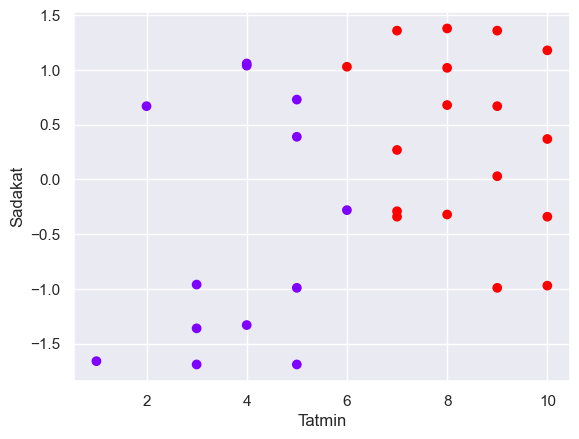

In [12]:
# c (color-renk) bir değişkenle kodlanabilen bir argümandır
# Bu durumda değişken, plt.scatter'a iki renk olduğunu gösteren 0,1 değerlerine sahiptir (0,1)
# Küme 0'daki tüm noktalar aynı renk, küme 1'deki tüm noktalar - başka bir renk vb.
# cmap renk haritasıdır. Gökkuşağı seçelim, ama başkalarını seçmek için: https://matplotlib.org/users/colormaps.html
plt.scatter(clusters['tatmin'],clusters['sadakat'],c=clusters['kume_tahmin'],cmap='rainbow')
plt.xlabel('Tatmin')
plt.ylabel('Sadakat')

In [13]:
# Bunu kolayca yapabilen bir kütüphaneyi içe aktaralım
from sklearn import preprocessing
# Girdileri ölçeklendirelim (scale)
# preprocessing.scale her değişkeni (x'deki kolon) kendisine göre ölçeklendirir
# Yeni sonuç bir dizidir
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [14]:
# Boş bir liste oluşturalım
kikt =[]

# Olası tüm küme çözümlerini bir döngü ile oluşturalım
# 1 ila 9 kümeden çözüm elde etmeyi seçtik; dilerseniz bunu değiştirebilirsiniz
for i in range(1,10):
    # i kümeleriyle küme çözümü
    kmeans = KMeans(i)
    # STANDARTLAŞTIRILMIŞ veriyi fit ediyoruz
    kmeans.fit(x_scaled)
    # Yineleme değerlerini kikt'ye ekliyoruz
    kikt.append(kmeans.inertia_)
    
# Sonucu kontrol ediyoruz
kikt

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.621963955792326,
 5.348079410290981,
 4.430999057496253,
 3.8972567379057566]

Text(0, 0.5, 'Küme-içi Kareler Toplamı')

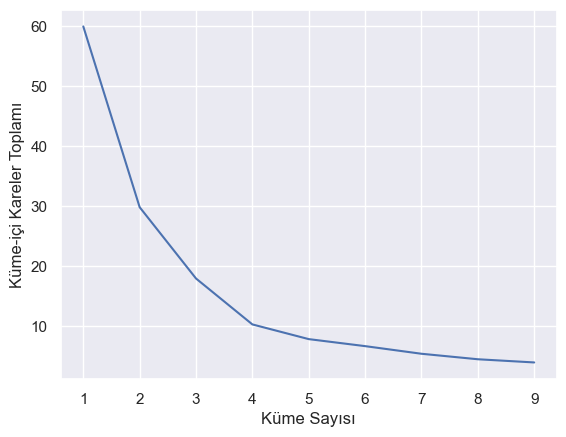

In [15]:
# Küme sayısı vs kikt grafiğini çiziyoruz
plt.plot(range(1,10),kikt)
# Eksenleri isimlendirelim
plt.xlabel('Küme Sayısı')
plt.ylabel('Küme-içi Kareler Toplamı')

In [16]:
# Küme sayısı için 2,3,4 ve 5'i deneyebilirsiniz.
kmeans_new = KMeans(4)
# Veriyi fit et
kmeans_new.fit(x_scaled)
# Öngörülen kümelerle yeni bir veri çerçevesi oluşturalım
clusters_new = x.copy()
clusters_new['kume_tahmin'] = kmeans_new.fit_predict(x_scaled)

In [17]:
# Her şeyin doğru görünüp görünmediğini kontrol edelim
clusters_new

,tatmin,sadakat,kume_tahmin
0,4,-1.33,3
1,6,-0.28,2
2,5,-0.99,3
3,7,-0.29,2
4,4,1.06,1
5,1,-1.66,3
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Sadakat')

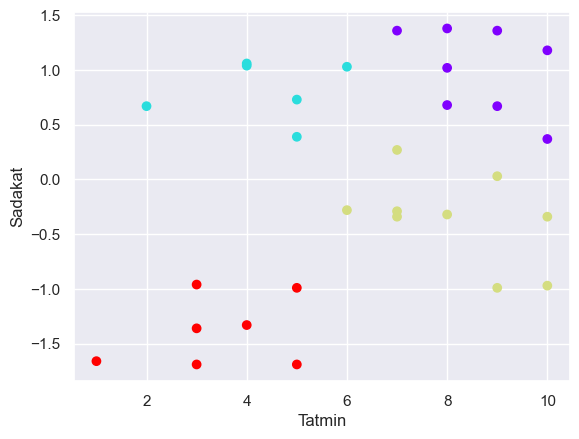

In [18]:
# Çizim
plt.scatter(clusters_new['tatmin'],clusters_new['sadakat'],c=clusters_new['kume_tahmin'],cmap='rainbow')
plt.xlabel('Tatmin')
plt.ylabel('Sadakat')